In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore") 

In [78]:
df = pd.read_csv("House_Rent_Dataset.csv")

In [79]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [80]:
df.shape

(4746, 12)

In [81]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

### Feature:Tenant Preferred

In [82]:
df["Tenant Preferred"].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [83]:
for i in df["Tenant Preferred"].head(10):
    print(i)
        

Bachelors/Family
Bachelors/Family
Bachelors/Family
Bachelors/Family
Bachelors
Bachelors/Family
Bachelors
Bachelors
Bachelors
Bachelors/Family


In [84]:
df["Tenant Preferred"].head(10)

0    Bachelors/Family
1    Bachelors/Family
2    Bachelors/Family
3    Bachelors/Family
4           Bachelors
5    Bachelors/Family
6           Bachelors
7           Bachelors
8           Bachelors
9    Bachelors/Family
Name: Tenant Preferred, dtype: object

In [85]:
for i in range(len(df["Tenant Preferred"])):
    if df["Tenant Preferred"][i] == "Bachelors/Family":
        df["Tenant Preferred"][i] = "Any"
    else:
        df["Tenant Preferred"][i]

### Feature: Point of Contact

In [86]:
df["Point of Contact"].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

In [87]:
def replace(data,column):
    for i in range(len(data)):
        data[column][i]= data[column][i].split()[1]

In [88]:
replace(df,"Point of Contact")

In [89]:
df["Point of Contact"]

0       Owner
1       Owner
2       Owner
3       Owner
4       Owner
        ...  
4741    Owner
4742    Owner
4743    Agent
4744    Agent
4745    Owner
Name: Point of Contact, Length: 4746, dtype: object

### Split the Date, Month, Year

In [90]:
df[["Year", "Month", "Day"]] = df["Posted On"].str.split("-", expand = True)

In [91]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Day
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Any,2,Owner,2022,05,18
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Any,1,Owner,2022,05,13
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Any,1,Owner,2022,05,16
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Any,1,Owner,2022,07,04
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Owner,2022,05,09


### Drop the "Posted On"

In [92]:
posted_on = list(df["Posted On"])

In [93]:
posted_on

['2022-05-18',
 '2022-05-13',
 '2022-05-16',
 '2022-07-04',
 '2022-05-09',
 '2022-04-29',
 '2022-06-21',
 '2022-06-21',
 '2022-06-07',
 '2022-06-20',
 '2022-05-23',
 '2022-06-07',
 '2022-05-14',
 '2022-05-09',
 '2022-05-05',
 '2022-06-01',
 '2022-05-17',
 '2022-06-20',
 '2022-06-09',
 '2022-06-09',
 '2022-07-02',
 '2022-06-14',
 '2022-06-15',
 '2022-06-15',
 '2022-05-28',
 '2022-05-22',
 '2022-06-18',
 '2022-06-25',
 '2022-06-22',
 '2022-06-25',
 '2022-05-21',
 '2022-06-26',
 '2022-06-16',
 '2022-06-29',
 '2022-05-10',
 '2022-05-12',
 '2022-06-03',
 '2022-05-31',
 '2022-06-10',
 '2022-06-24',
 '2022-06-29',
 '2022-05-12',
 '2022-06-26',
 '2022-04-30',
 '2022-05-27',
 '2022-06-06',
 '2022-05-20',
 '2022-07-02',
 '2022-05-26',
 '2022-05-12',
 '2022-06-22',
 '2022-06-25',
 '2022-07-03',
 '2022-04-23',
 '2022-05-14',
 '2022-05-27',
 '2022-06-19',
 '2022-06-19',
 '2022-07-02',
 '2022-07-06',
 '2022-07-02',
 '2022-06-21',
 '2022-06-04',
 '2022-06-24',
 '2022-05-14',
 '2022-06-26',
 '2022-07-

In [94]:
df=df.drop(["Posted On"], axis=1)

### Droping the Year column

Dropped the year column because all the houses are posted on year 2022.

In [95]:
df["Year"].value_counts()

2022    4746
Name: Year, dtype: int64

In [96]:
df = df.drop(["Year"],axis=1)

In [97]:
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Any,2,Owner,05,18
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Any,1,Owner,05,13
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Any,1,Owner,05,16
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Any,1,Owner,07,04
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Owner,05,09


### Feature:Floor

In [98]:
for i in range(len(df["Floor"])):
    x = df["Floor"][i].split()
    if len(x) == 1:
        print(i,"====",x)


2553 ==== ['3']
2883 ==== ['Ground']
4490 ==== ['1']
4560 ==== ['1']


In [99]:
x = df["Floor"][2883].split()[-1]
x

'Ground'

In [100]:
Floor_No=[]
Total_Floors = []
for i in range(len(df["Floor"])):    
    Floor_No.append(df["Floor"][i].split()[0])
    Total_Floors.append(df["Floor"][i].split()[-1])

In [101]:
df["Floor No"] = Floor_No
df["Total Floors"] = Total_Floors

### Droping Floor

In [102]:
df=df.drop(["Floor"], axis=1)

In [103]:
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor No,Total Floors
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Any,2,Owner,05,18,Ground,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Any,1,Owner,05,13,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Any,1,Owner,05,16,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Any,1,Owner,07,04,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Owner,05,09,1,2


In [104]:
df["Floor No"].replace("Ground",0)

0        0
1        1
2        1
3        1
4        1
        ..
4741     3
4742     1
4743     3
4744    23
4745     4
Name: Floor No, Length: 4746, dtype: object

In [105]:
for i in range(len(df["Floor No"])):
    if df["Floor No"][i] == "Upper":
        df["Floor No"][i] = df["Total Floors"][i]
    elif df["Floor No"][i] == "Lower":
        df["Floor No"][i] = 0

In [106]:
for i in range(len(df["Total Floors"])):
    if df["Total Floors"][i] == "Ground":
        df["Total Floors"][i] = 0

In [107]:
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor No,Total Floors
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Any,2,Owner,05,18,Ground,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Any,1,Owner,05,13,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Any,1,Owner,05,16,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Any,1,Owner,07,04,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Owner,05,09,1,2


In [108]:
for i in range(len(df["Floor No"])):
    if df["Floor No"][i] == "Ground":
        df["Floor No"][i] = 0
    else:
        df["Floor No"][i]

In [109]:
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor No,Total Floors
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Any,2,Owner,05,18,0,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Any,1,Owner,05,13,1,3
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Any,1,Owner,05,16,1,3
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Any,1,Owner,07,04,1,2
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Owner,05,09,1,2


### Cleaning the "Area Locality"

In [110]:
df["Area Locality"].value_counts()

Bandra West                                   37
Gachibowli                                    29
Electronic City                               24
Miyapur, NH 9                                 22
Velachery                                     22
                                              ..
Evershine Grandeur, Mindspace                  1
Rohini Sector 22                               1
Srinivasa Nagar-Banashankari, Banashankari     1
Saidapet West, Saidapet                        1
Karambakkam, Porur                             1
Name: Area Locality, Length: 2235, dtype: int64

In [111]:
Area_1 =[]
Area_2 =[]
for i in range(len(df["Area Locality"])):
    x = df["Area Locality"][i].split(",")
    if len(x) == 1:
        Area_1.append(x[0])
        Area_2.append(x[0])
    else:
        Area_1.append(x[0])
        Area_2.append(x[1])




In [112]:
df["Area Locality 1"] = Area_1
df["Area Locality_2"] = Area_2

In [113]:
df.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor No,Total Floors,Area Locality 1,Area Locality_2
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Any,2,Owner,05,18,0,2,Bandel,Bandel
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Any,1,Owner,05,13,1,3,Phool Bagan,Kankurgachi
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Any,1,Owner,05,16,1,3,Salt Lake City Sector 2,Salt Lake City Sector 2
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Any,1,Owner,07,04,1,2,Dumdum Park,Dumdum Park
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Owner,05,09,1,2,South Dum Dum,South Dum Dum


### Droping the Area Locality

In [114]:
df = df.drop(["Area Locality"],axis=1)

In [115]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor No,Total Floors,Area Locality 1,Area Locality_2
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Any,2,Owner,05,18,0,2,Bandel,Bandel
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Any,1,Owner,05,13,1,3,Phool Bagan,Kankurgachi
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Any,1,Owner,05,16,1,3,Salt Lake City Sector 2,Salt Lake City Sector 2
3,2,10000,800,Super Area,Kolkata,Unfurnished,Any,1,Owner,07,04,1,2,Dumdum Park,Dumdum Park
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Owner,05,09,1,2,South Dum Dum,South Dum Dum


### Finding the Null Values

In [116]:
df.isna().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
Month                0
Day                  0
Floor No             0
Total Floors         0
Area Locality 1      0
Area Locality_2      0
dtype: int64

In [72]:
df.to_csv("Cleaned_house_rent.csv", index = False)
df.to_excel("Cleaned_house_rent.xlsx", index = False)

In [117]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Month,Day,Floor No,Total Floors,Area Locality 1,Area Locality_2
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Any,2,Owner,05,18,0,2,Bandel,Bandel
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Any,1,Owner,05,13,1,3,Phool Bagan,Kankurgachi
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Any,1,Owner,05,16,1,3,Salt Lake City Sector 2,Salt Lake City Sector 2
3,2,10000,800,Super Area,Kolkata,Unfurnished,Any,1,Owner,07,04,1,2,Dumdum Park,Dumdum Park
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Owner,05,09,1,2,South Dum Dum,South Dum Dum


## Analyzing the Data

In [40]:
listed = df['BHK'].value_counts()
furnishing = df['Furnishing Status'].value_counts()
Tenant = df["Tenant Preferred"].value_counts()
City = df["City"].value_counts()

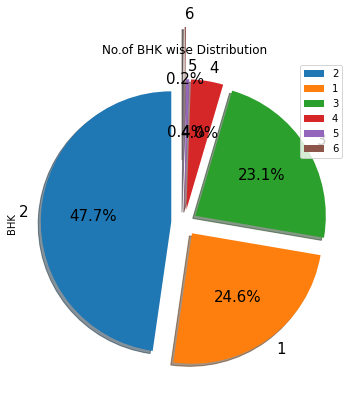

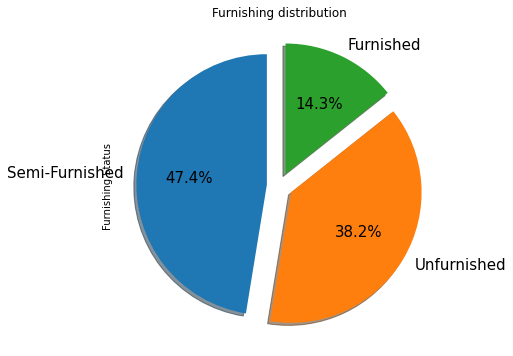

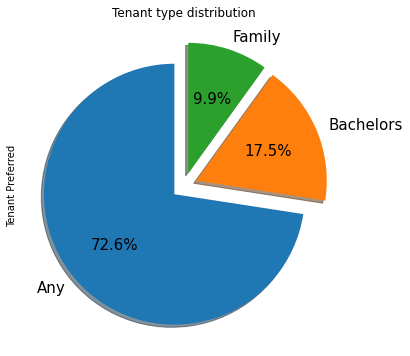

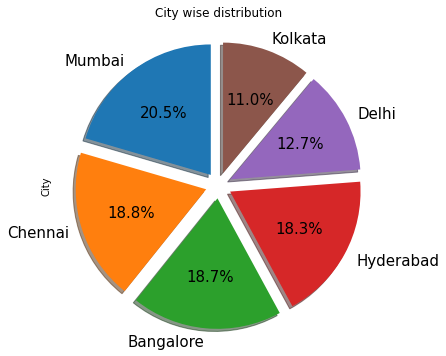

In [41]:
plt.figure(0)
listed.plot.pie(startangle = 90, shadow = True,explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.5), autopct = '%1.1f%%', y = 'CATOGORIES',fontsize =15, figsize = (6,6), title = 'No.of BHK wise Distribution')
plt.legend()
plt.show

plt.figure(1)
furnishing.plot.pie(startangle = 90, shadow = True, explode = (0.1, 0.1, 0.1), autopct = '%1.1f%%', y = 'CATOGORIES',fontsize =15, figsize = (6,6), title = 'Furnishing distribution')
plt.show()

plt.figure(2)
Tenant.plot.pie(startangle = 90, shadow = True, explode = (0.1, 0.1, 0.1), autopct = '%1.1f%%', y = 'CATOGORIES',fontsize =15, figsize = (6,6), title = 'Tenant type distribution')
plt.show()

plt.figure(3)
City.plot.pie(startangle = 90, shadow = True, explode = (0.1, 0.1, 0.1,0.1,0.1,0.1), autopct = '%1.1f%%', y = 'CATOGORIES',fontsize =15, figsize = (6,6), title = 'City wise distribution')
plt.show()

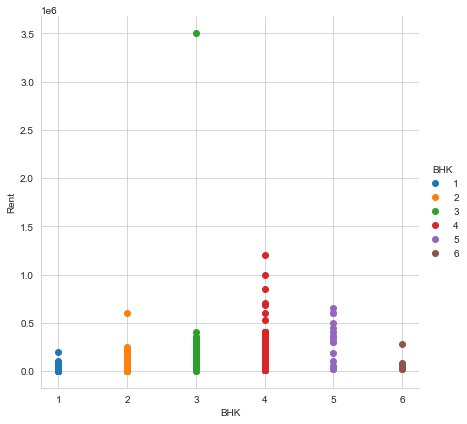

In [42]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="BHK", size=6) \
   .map(plt.scatter, "BHK", "Rent") \
   .add_legend();
plt.show();

<Figure size 432x288 with 0 Axes>

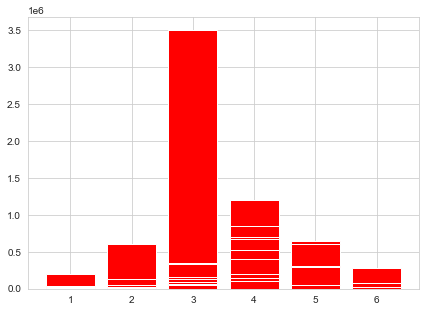

<Figure size 432x288 with 0 Axes>

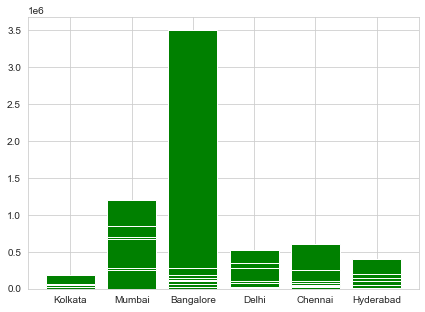

In [44]:
plt.figure(0)
fig = plt.figure(figsize=(7,5))
plt.bar(df["BHK"],df["Rent"], color = 'r')
plt.show()

plt.figure(1)
fig = plt.figure(figsize=(7,5))
plt.bar(df["City"],df["Rent"], color = 'g')
plt.show()



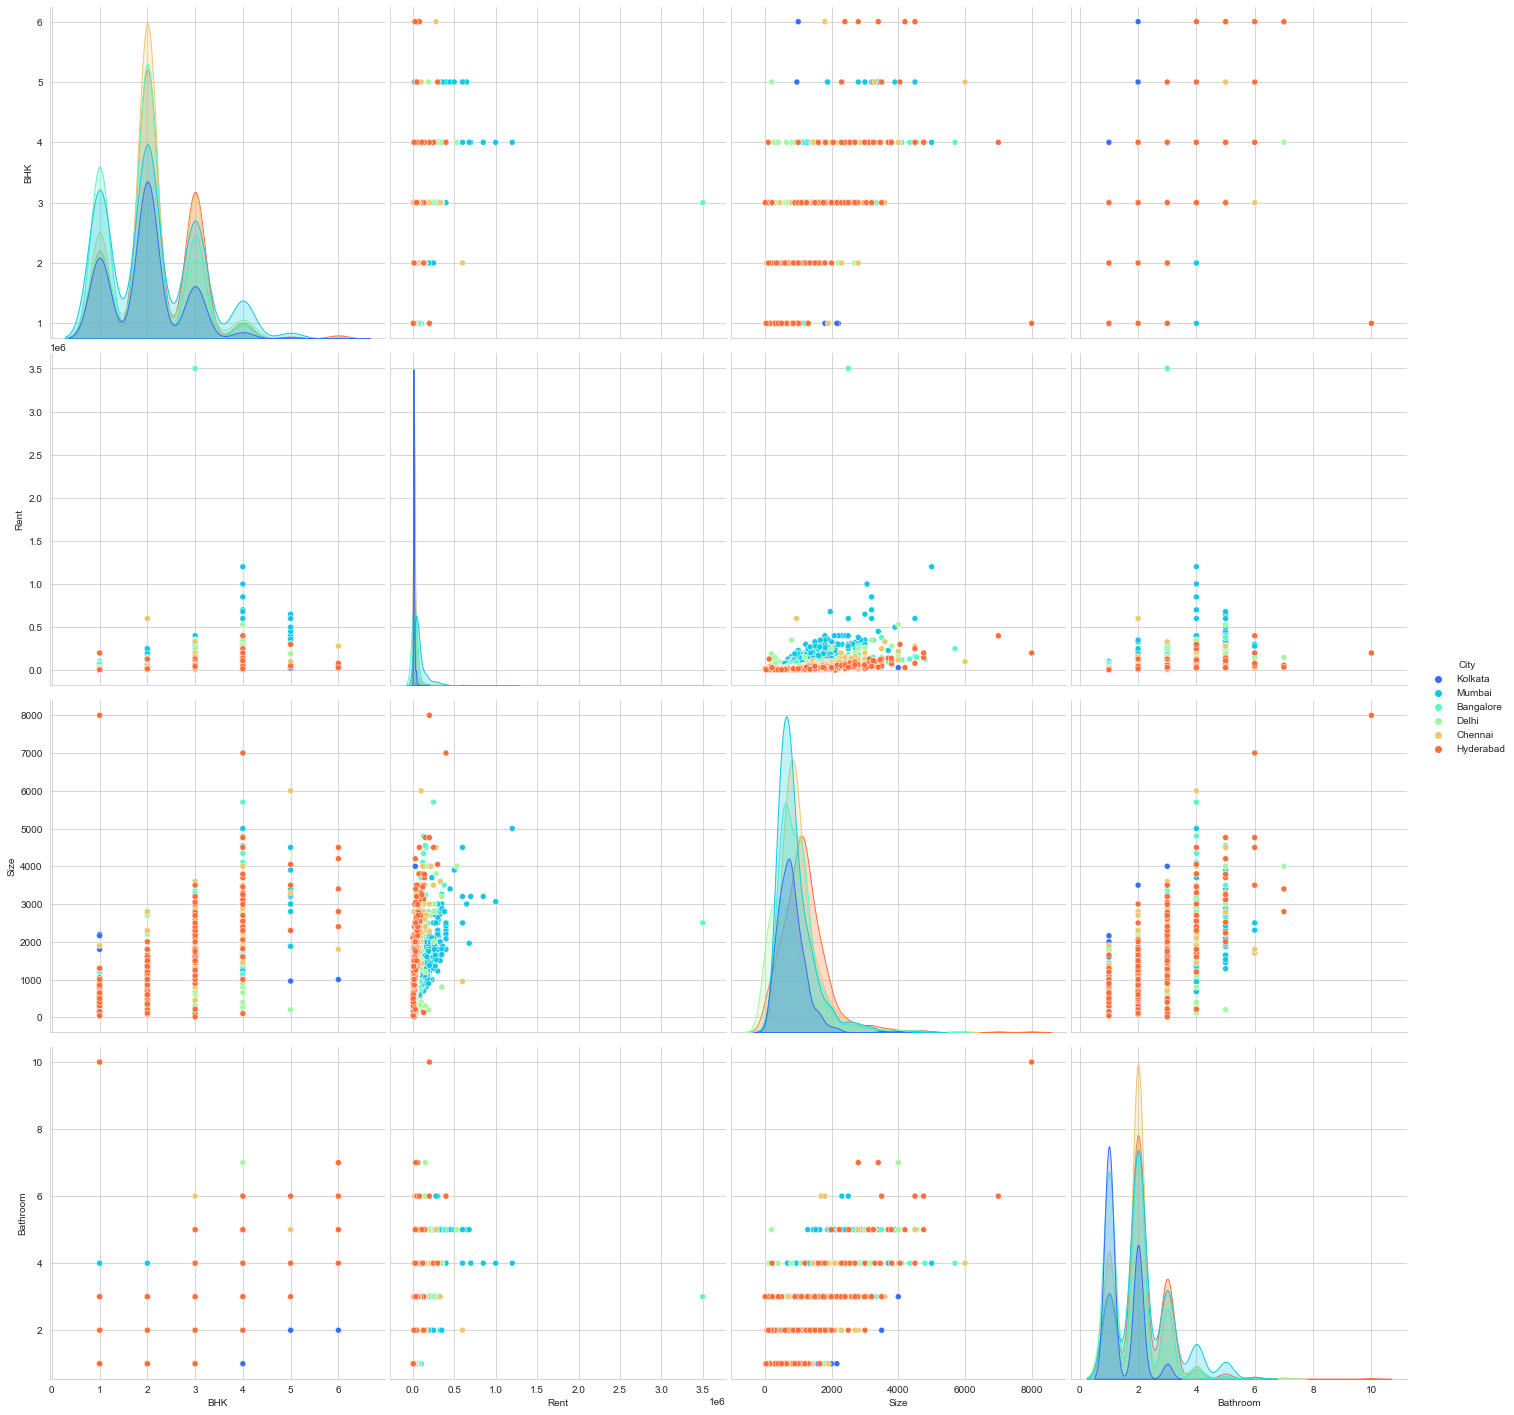

In [45]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="City", palette="rainbow",size=5);
plt.show()

1. Almost 50% of the houses are the 2 BHK And Very less quantity of 5 and 6 BHK houses.
2. 24% and 23% of the houses are the 3 and 4 BHK houses respectively.Almost 3 & 4 BHK houses are in same quantity.
3. Least of the houses are the furnished and most of the houses are the Semi-Furnished.
4. Almost 73% of the properties preferred Any (Bachelors or Family) type of Tenants.
5. Mumbai city has more properties are available for rent.
6. Chennai,Banglore and Hyderabad cities have the almost same percentage of properties available.
